In [274]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [229]:
df = pd.read_csv('train.csv')

In [230]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Q1 : Load the training data, how many numerical features do you have? (if you are using Orange, manually set up CryoSleep, VIP, and Transported as Categorical)

Q2: How many observations do you have in a training set? 

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Q3: Select Age groups with a prevalent number (compared to not Transported passengers of the same group) of Transported passengers (hint: plot histogram)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


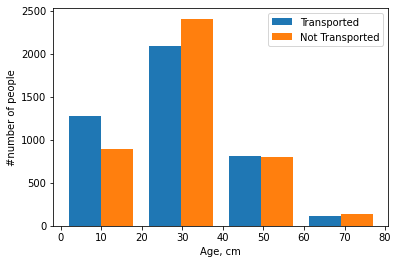

In [232]:
plt.hist([df.Age[df.Transported==True],df.Age[df.Transported==False]],
         bins = 4,
         label = ['Transported', 'Not Transported']);
plt.legend()
plt.ylabel('#number of people')
plt.xlabel('Age, cm');

Q4: Which HomePlanet has the highest percentage (compared to not Transported passengers of the same group) of Transported passengers ?

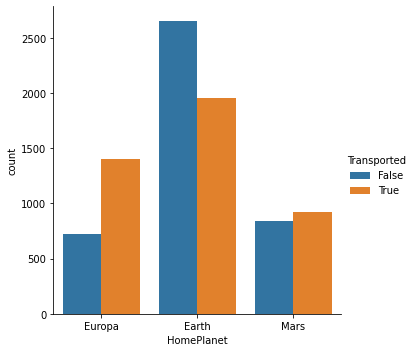

In [233]:
sns.catplot(x="HomePlanet", hue="Transported", kind="count", data=df)

Q5: Does CryoSleep increase the chances of being Transported? (compare ratio of Transported passengers among those who  was in a CryoSleep and who was not.)

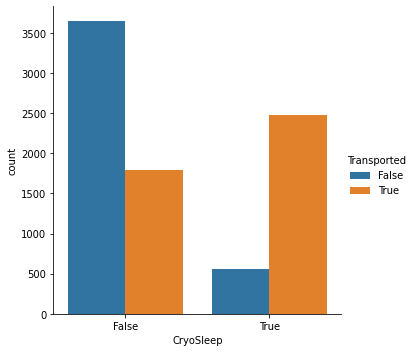

In [234]:
sns.catplot(x="CryoSleep", hue="Transported", kind="count", data=df)

Handeling Traning data

In [235]:
data = df.drop(labels=['PassengerId', 'Cabin' , 'Name'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [236]:
cat_features = ['HomePlanet', 'CryoSleep' ,'Destination', 'VIP']
for cat in cat_features:
  print ("number of missing values in " + str(cat)+ " column is: " + str(data[cat].isna().sum()))
  # filling with most common class
  data[cat] = data[cat].fillna(data[cat].value_counts().index[0])
  print(data[cat].isna().sum())
data.head()

number of missing values in HomePlanet column is: 201
0
number of missing values in CryoSleep column is: 217
0
number of missing values in Destination column is: 182
0
number of missing values in VIP column is: 203
0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [237]:
print (data['Age'].isna().sum())

179


In [238]:
aver_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(aver_age)
print(data['Destination'].isna().sum())
data.head()

0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [239]:
num_features = ['RoomService', 'FoodCourt' ,'ShoppingMall', 'Spa' , 'VRDeck']
for num in num_features:
  print ("number of missing values in " + str(num)+ " column is: " + str(data[num].isna().sum()))
  # filling with zeros
  data[num] = data[num].fillna(0)
  print(data[num].isna().sum())
data.head()

number of missing values in RoomService column is: 181
0
number of missing values in FoodCourt column is: 183
0
number of missing values in ShoppingMall column is: 208
0
number of missing values in Spa column is: 183
0
number of missing values in VRDeck column is: 188
0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [240]:
print (data['Transported'].isna().sum())

0


In [241]:
x_train = data.drop(['Transported'],axis = 1)
y_train = data['Transported']
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [242]:
#one hit encoding

ohe_features = pd.get_dummies(x_train[['HomePlanet', 'CryoSleep' ,'Destination']])
x_train = pd.concat([x_train ,ohe_features],axis = 1 )
x_train = x_train.drop(['HomePlanet', 'CryoSleep' ,'Destination'],axis =1)

x_train["VIP"].replace({False : 0 ,True: 1}, inplace=True)
x_train.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1


In [243]:
#scaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [244]:
X_train = scaler.fit_transform(x_train) 

In [245]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
# create model
knn = KNeighborsClassifier(n_neighbors= 10)
# evaluate model
scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Average Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Average Accuracy: 0.778 (0.007)


######Testing Data

In [246]:
df = pd.read_csv('test.csv')

In [247]:
data = df.drop(labels=['PassengerId', 'Cabin' , 'Name'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4185 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


In [248]:
cat_features = ['HomePlanet', 'CryoSleep' ,'Destination', 'VIP']
for cat in cat_features:
  print ("number of missing values in " + str(cat)+ " column is: " + str(data[cat].isna().sum()))
  # filling with most common class
  data[cat] = data[cat].fillna(data[cat].value_counts().index[0])
  print(data[cat].isna().sum())
data.head()

number of missing values in HomePlanet column is: 87
0
number of missing values in CryoSleep column is: 93
0
number of missing values in Destination column is: 92
0
number of missing values in VIP column is: 93
0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [249]:
print (data['Age'].isna().sum())

91


In [250]:
aver_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(aver_age)
print(data['Destination'].isna().sum())
data.head()

0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [251]:
num_features = ['RoomService', 'FoodCourt' ,'ShoppingMall', 'Spa' , 'VRDeck']
for num in num_features:
  print ("number of missing values in " + str(num)+ " column is: " + str(data[num].isna().sum()))
  # filling with zeros
  data[num] = data[num].fillna(0)
  print(data[num].isna().sum())
data.head()

number of missing values in RoomService column is: 82
0
number of missing values in FoodCourt column is: 106
0
number of missing values in ShoppingMall column is: 98
0
number of missing values in Spa column is: 101
0
number of missing values in VRDeck column is: 80
0


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [252]:
x_test = data
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [253]:
#one hit encoding

ohe_features = pd.get_dummies(x_test[['HomePlanet', 'CryoSleep' ,'Destination']])
x_test = pd.concat([x_test ,ohe_features],axis = 1 )
x_test = x_test.drop(['HomePlanet', 'CryoSleep' ,'Destination'],axis =1)

x_test["VIP"].replace({False : 0 ,True: 1}, inplace=True)
x_test.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,27.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1
1,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,0,1
2,31.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
3,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,0,1
4,20.0,0,10.0,0.0,635.0,0.0,0.0,1,0,0,0,0,1


In [254]:
#scaler
scaler = StandardScaler()
scaler.fit(x_test)


StandardScaler()

In [255]:
X_test = scaler.fit_transform(x_test) 

Output

In [256]:
knn.fit (x_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [257]:
knn.predict(x_test)

array([ True, False,  True, ...,  True,  True,  True])

In [269]:
output = pd.DataFrame(knn.predict(x_test) , columns=['Transported'])
output.head

<bound method NDFrame.head of       Transported
0            True
1           False
2            True
3            True
4           False
...           ...
4272         True
4273        False
4274         True
4275         True
4276         True

[4277 rows x 1 columns]>

In [270]:
tmp_df = pd.read_csv('test.csv')['PassengerId']
tmp_df.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [271]:
output = pd.concat ([tmp_df ,output ],axis = 1)
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [273]:
output.to_csv("output.csv")